In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('aug_train.csv')

#### Количество строк и столбцов таблицы, названия и типы данных столбцов, количество пропущенных данных (в процентах), первые пять строк таблицы

In [3]:
df.shape

(19158, 14)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [34]:
df.isna().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [3]:
df[:5]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Доли "стабильных" и "нестабильных" аналитиков данных

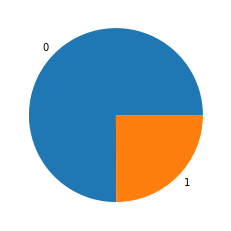

In [19]:
plt.pie(df.target.value_counts().values, labels = df.target.value_counts().index.astype(int))
plt.show()

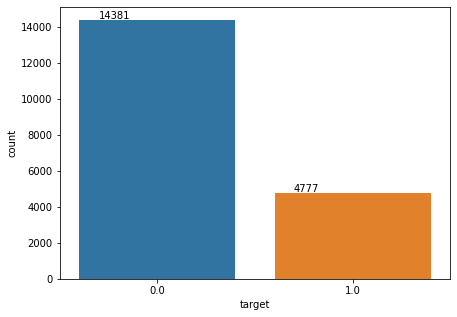

In [21]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=df['target'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### Влияние пола аналитика на его стабильность на работе

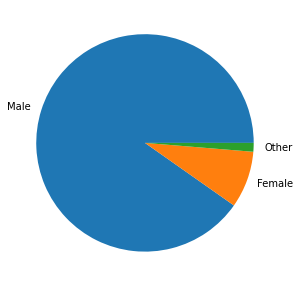

In [17]:
plt.figure(figsize=(7,5))
ax = plt.pie(df.gender.value_counts().values, labels = df.gender.value_counts().index)

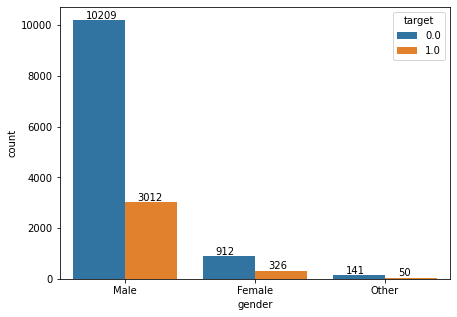

In [13]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=df['gender'], hue=df['target'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

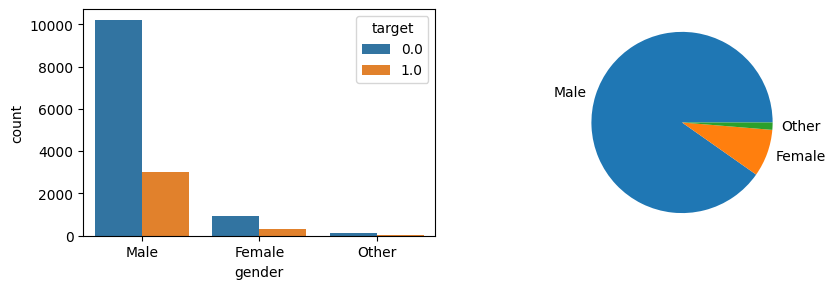

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), dpi=100)

plt.pie(df.gender.value_counts().values, labels = df.gender.value_counts().index)
sns.countplot(ax=axes[0], x=df['gender'], hue=df['target'], order=df['gender'].value_counts().index)

plt.show()

### Влияние наличия соответствующего опыта на стабильность сотрудника на работе

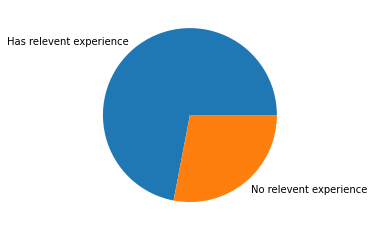

In [22]:
plt.pie(df.relevent_experience.value_counts().values, labels = df.relevent_experience.value_counts().index)
plt.show()

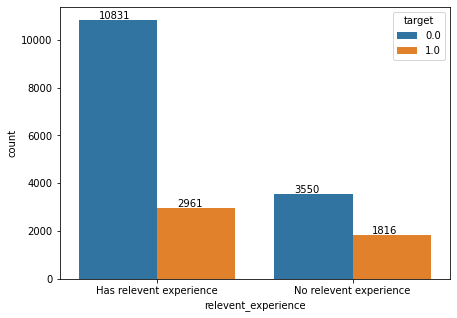

In [23]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x=df['relevent_experience'], hue=df['target'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

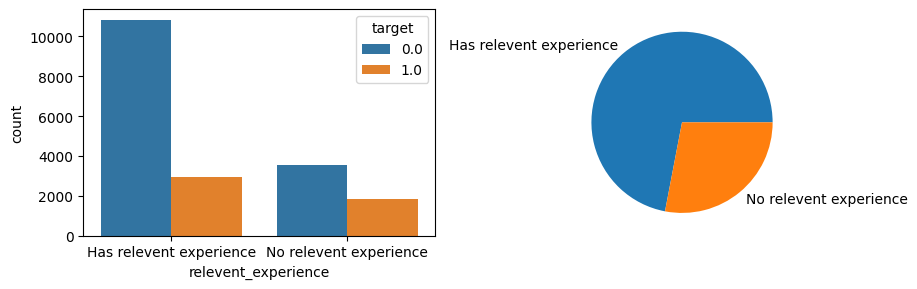

In [183]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), dpi=100)

plt.pie(df.relevent_experience.value_counts().values, labels = df.relevent_experience.value_counts().index)
sns.countplot(ax=axes[0], x=df['relevent_experience'], hue=df['target'], order=df['relevent_experience'].value_counts().index)

plt.show()

### Влияние наличия соответствующего опыта на стабильность сотрудника на работе

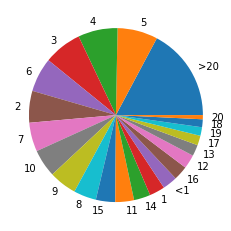

In [100]:
plt.pie(df.experience.value_counts().values, labels = df.experience.value_counts().index)
plt.show()

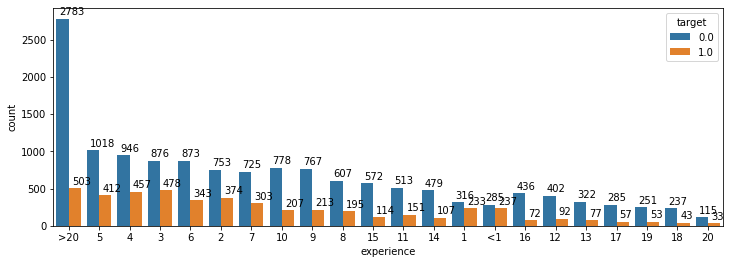

In [24]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(x=df['experience'], hue=df['target'], order=df['experience'].value_counts().index)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

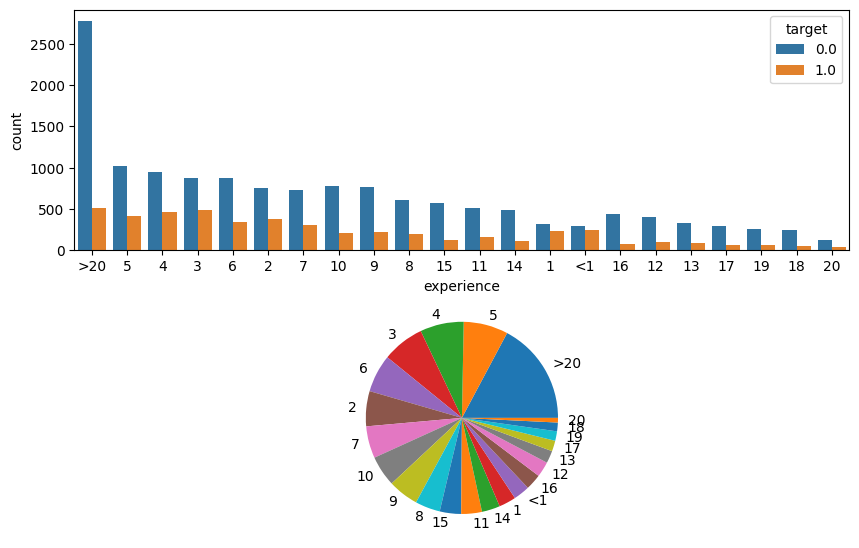

In [182]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), dpi=100)

plt.pie(df.experience.value_counts().values, labels = df.experience.value_counts().index)
sns.countplot(ax=axes[0], x=df['experience'], hue=df['target'], order=df['experience'].value_counts().index)

plt.show()

### Влияние обучения в университете на стабильность сотрудника на работе

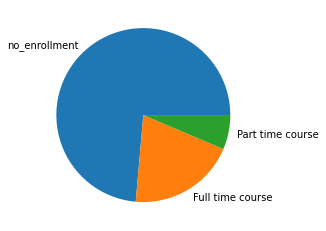

In [102]:
plt.pie(df.enrolled_university.value_counts().values, labels = df.enrolled_university.value_counts().index)
plt.show()

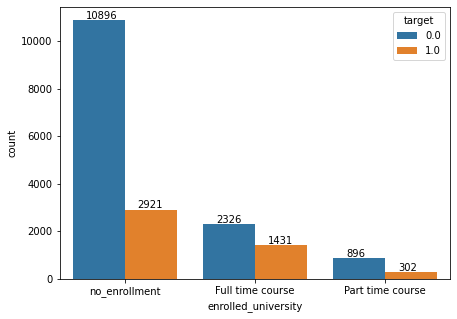

In [26]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=df['enrolled_university'], hue=df['target'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

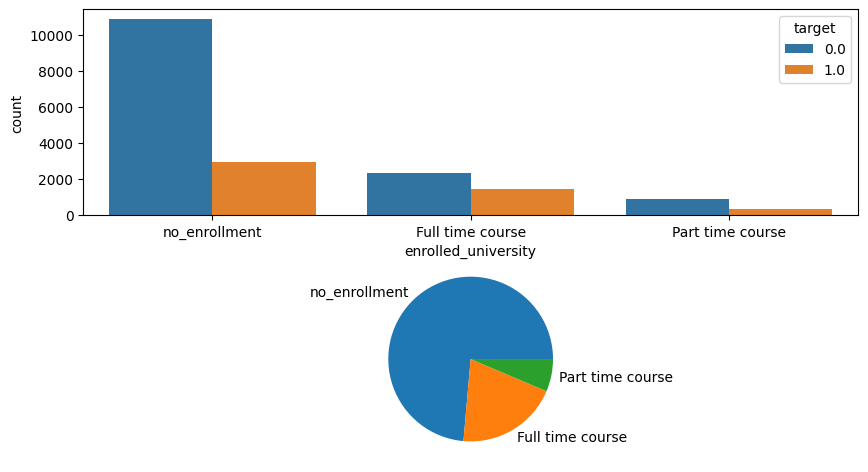

In [180]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=100)

plt.pie(df.enrolled_university.value_counts().values, labels = df.enrolled_university.value_counts().index)
sns.countplot(ax=axes[0], x=df['enrolled_university'], hue=df['target'], order=df['enrolled_university'].value_counts().index)

plt.show()

### Влияние уровня образования на стабильность сотрудника на работе

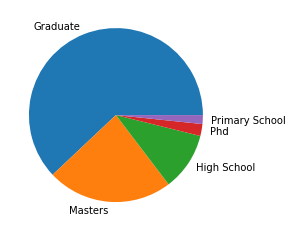

In [103]:
plt.pie(df.education_level.value_counts().values, labels = df.education_level.value_counts().index)
plt.show()

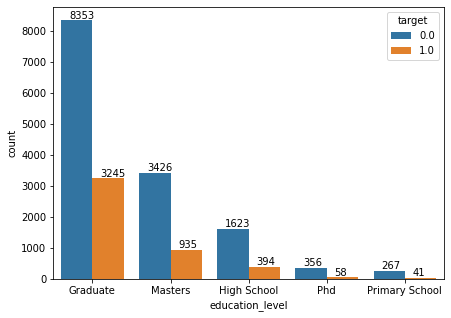

In [27]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=df['education_level'], hue=df['target'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

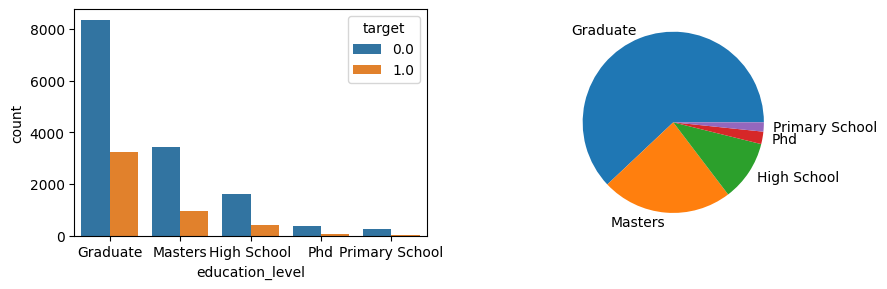

In [179]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), dpi=100)

plt.pie(df.education_level.value_counts().values, labels = df.education_level.value_counts().index)
sns.countplot(ax=axes[0], x=df['education_level'], hue=df['target'], order=df['education_level'].value_counts().index)

plt.show()

### Влияние основной изучаемой дисциплины на стабильность сотрудника на работе

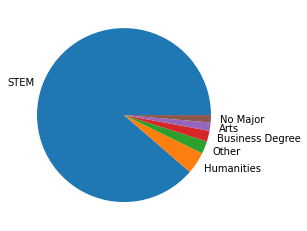

In [104]:
plt.pie(df.major_discipline.value_counts().values, labels = df.major_discipline.value_counts().index)
plt.show()

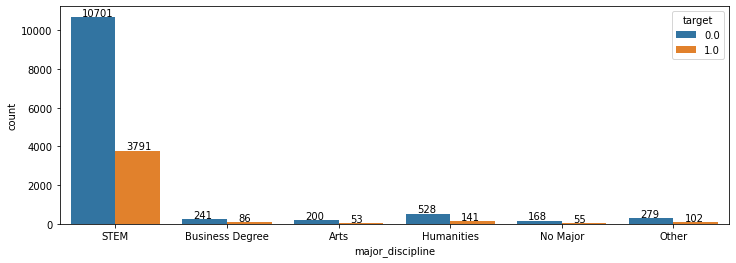

In [28]:
plt.figure(figsize=(12, 4))
ax=sns.countplot(x=df['major_discipline'], hue=df['target'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

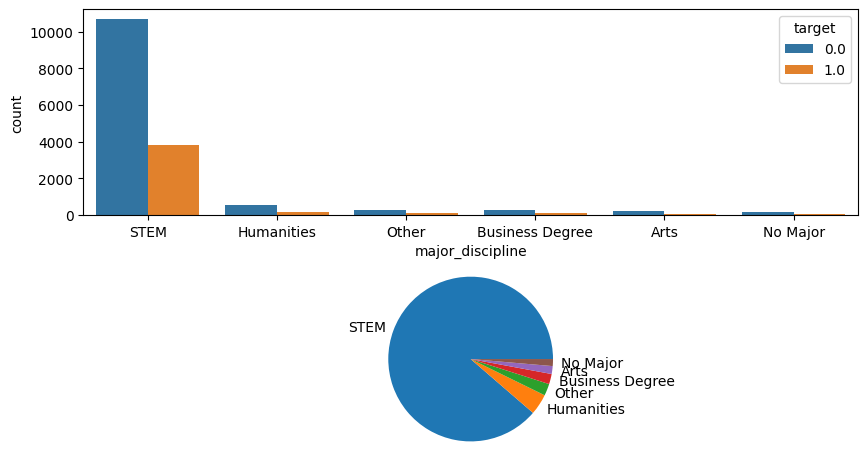

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=100)

plt.pie(df.major_discipline.value_counts().values, labels = df.major_discipline.value_counts().index)
sns.countplot(ax=axes[0], x=df['major_discipline'], hue=df['target'], order=df['major_discipline'].value_counts().index)

plt.show()

### Влияние типа компании на стабильность сотрудника на работе

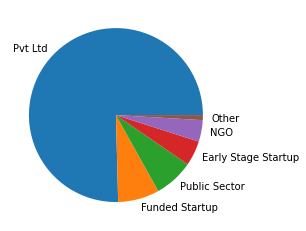

In [105]:
plt.pie(df.company_type.value_counts().values, labels = df.company_type.value_counts().index)
plt.show()

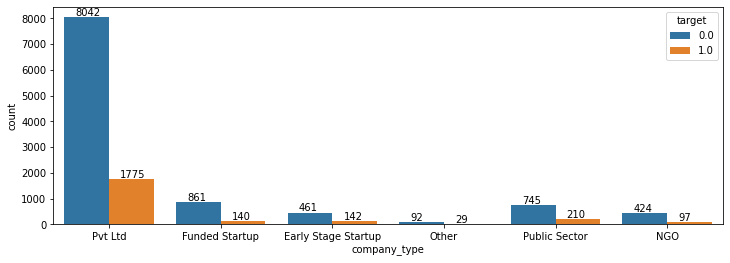

In [29]:
plt.figure(figsize=(12, 4))
ax=sns.countplot(x=df['company_type'], hue=df['target'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

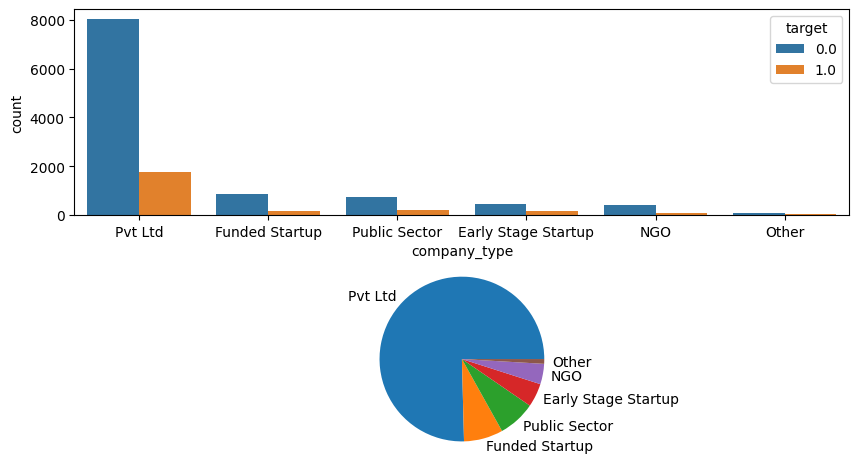

In [173]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=100)

plt.pie(df.company_type.value_counts().values, labels = df.company_type.value_counts().index)
sns.countplot(ax=axes[0], x=df['company_type'], hue=df['target'], order=df['company_type'].value_counts().index)

plt.show()

### Влияние размера компании стабильность сотрудника на работе

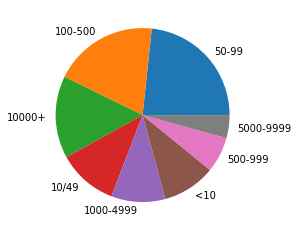

In [106]:
plt.pie(df.company_size.value_counts().values, labels = df.company_size.value_counts().index)
plt.show()

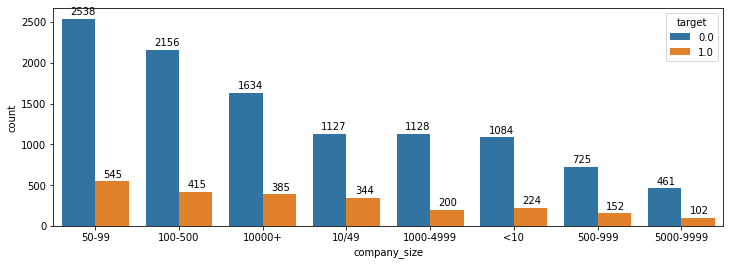

In [30]:
plt.figure(figsize=(12, 4))
ax=sns.countplot(x=df['company_size'], hue=df['target'], order=df['company_size'].value_counts().index)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

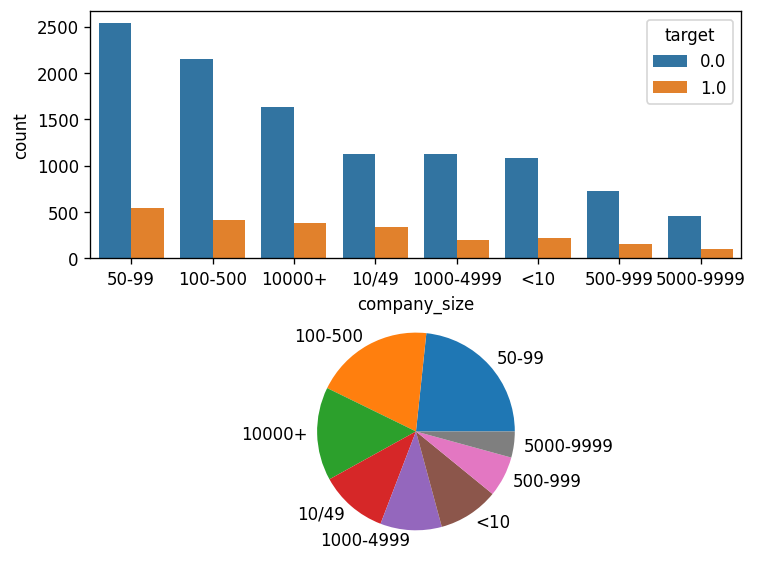

In [168]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 6), dpi=120)
#plt.figure(figsize=(6, 4))
plt.pie(df.company_size.value_counts().values, labels = df.company_size.value_counts().index)
sns.countplot(ax=axes[0], x=df['company_size'], hue=df['target'], order=df['company_size'].value_counts().index)
#plt.xlabel('company_size', fontsize=12)
#plt.xticks(rotation=45)
#ax.tick_params(axis='x', rotation=90)
#locs, labels = plt.xticks()
#sns.setp(labels, rotation=45)
plt.show()

### Влияние перерыва в трудовой деятельности на стабильность сотрудника на работе

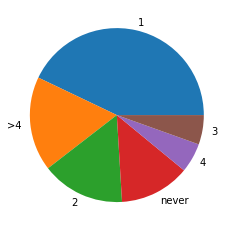

In [107]:
plt.pie(df.last_new_job.value_counts().values, labels = df.last_new_job.value_counts().index)
plt.show()

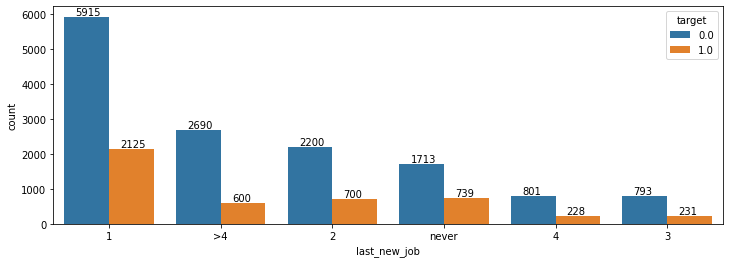

In [31]:
plt.figure(figsize=(12, 4))
ax=sns.countplot(x=df['last_new_job'], hue=df['target'], order=df['last_new_job'].value_counts().index)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

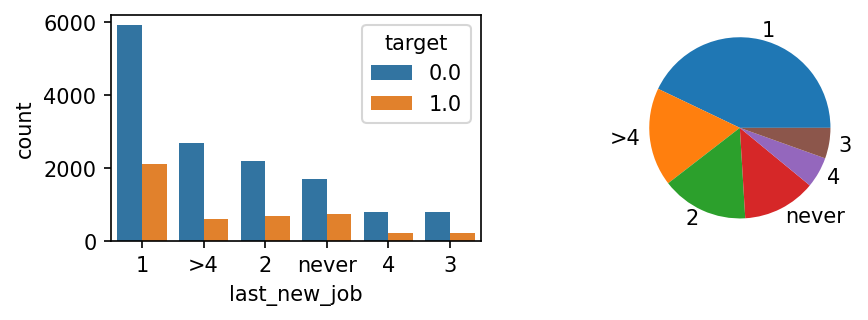

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 2), dpi=150)

plt.pie(df.last_new_job.value_counts().values, labels = df.last_new_job.value_counts().index)
sns.countplot(ax=axes[0], x=df['last_new_job'], hue=df['target'], order=df['last_new_job'].value_counts().index)

plt.show()